# Project 2 - Investigate a Dataset
### Renee Getter

### Objective:
Choose one of Udacity's curated datasets and investigate it using NumPy and pandas. Go through the entire data analysis process, starting by posing a question and finishing by sharing your findings. [Udacity project page](https://classroom.udacity.com/nanodegrees/nd002/parts/6f1ba175-1429-48e9-ab26-44d08ab21e7e/modules/0a58e8ea-c644-4024-861e-1a06ec4009c1/lessons/6b41e57c-9270-413b-b713-c6b2ec207b04/project)

For this project, I decided to explore the dataset available at [Gapminder World](https://www.gapminder.org/data/). I did not have any preconceived questions to answer, but instead wanted to look across several variables to see what relationships exist and to try to discover trends over time.

To get started, I downloaded the individual data tables for several variables that were interesting to me to start to explore the relationships among the variables and to determine what questions I wanted to answer with the data. I expected to narrow down the variables and dataset once I had explored a bit further. 

I downloaded the following data tables:
- income_per_person_gdppercapita_ppp_inflation_adjusted.csv
- population_total.csv
- children_per_woman_total_fertility.csv
- child_mortality_0_5_year_olds_dying_per_1000_born.csv
- life_expectancy_years.csv

For my exploration, I decided to use the life expectancy as the dependent variable and explore which of the other variables appear to impact the life expectancy for a country over the last 50 years. 


In [1]:
# Import the packages that I used for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Import all Gapminder world variables as pandas dataframes

df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_population = pd.read_csv('population_total.csv')
df_fertility = pd.read_csv('children_per_woman_total_fertility.csv')
df_mortality = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
df_expectancy = pd.read_csv('life_expectancy_years.csv')

In [3]:
''' As I want to look at how the other variables impact income growth per capita, I wanted to 
    explore that variable and determine which two contries would be interesting to study.
    
    I want to look only at the period 1970-2015 and to find the two countries with highest growth of 
    per capita income during that time.'''

# Determine the column index for the range I want using 2016 as the last column to have last column = 2015
first_yr = df_income.columns.get_loc("1970")
last_yr = df_income.columns.get_loc("2016")

# Slice the dataframe to only include the country and the years I am not interested in investigating
df_income_select = df_income.iloc[:, np.r_[0:1, first_yr:last_yr]]

# verify that the new dataframe contains only the columns I want
df_income_select.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,1180,1100,1050,1150,1180,1210,1240,1130,1190,...,1160,1290,1300,1530,1610,1660,1840,1810,1780,1750
1,Albania,3830,3980,4120,4320,4320,4330,4340,4340,4350,...,7920,8450,9150,9530,9930,10200,10400,10500,10700,11000
2,Algeria,7290,6490,7630,7650,7890,8200,8480,8980,9830,...,12300,12600,12700,12600,12900,13000,13200,13300,13500,13700
3,Andorra,33200,33000,34000,34900,35300,34100,34000,34000,33500,...,42700,43400,41400,41700,39000,42000,41900,43700,44900,46600
4,Angola,5550,5780,5670,6000,6060,5620,5200,5110,4720,...,4600,5440,5980,5910,5900,5910,6000,6190,6260,6230


In [4]:
# Calculate total growth for span and add the growth percentage as a new column 'growth'
df = df_income_select
df.loc[:,'growth'] = df.apply(lambda row: (row['2015'] - row['1970']) / row['1970'], axis=1)
df.head()

C:\Users\Moms\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Moms\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,growth
0,Afghanistan,1180,1100,1050,1150,1180,1210,1240,1130,1190,...,1290,1300,1530,1610,1660,1840,1810,1780,1750,0.483051
1,Albania,3830,3980,4120,4320,4320,4330,4340,4340,4350,...,8450,9150,9530,9930,10200,10400,10500,10700,11000,1.872063
2,Algeria,7290,6490,7630,7650,7890,8200,8480,8980,9830,...,12600,12700,12600,12900,13000,13200,13300,13500,13700,0.879287
3,Andorra,33200,33000,34000,34900,35300,34100,34000,34000,33500,...,43400,41400,41700,39000,42000,41900,43700,44900,46600,0.403614
4,Angola,5550,5780,5670,6000,6060,5620,5200,5110,4720,...,5440,5980,5910,5900,5910,6000,6190,6260,6230,0.122523


In [5]:
# Determine which countries are in the top 5% and bottom 5% for total growth
df = df_income_select

top_5 = df.growth.quantile(0.95)
bottom_5 = df.growth.quantile(0.05)
df_top_5 = df[df['growth'] > top_5]
df_bottom_5 = df[df['growth'] < bottom_5]

# Use statements below to view the new datasets
# print(df_top_5.head())
# print(df_bottom_5.head())

# create a list of the country names who were in the top %5 for overall growth
top_country_names = df_top_5['country']
bottom_country_names = df_bottom_5['country']

print(top_country_names)
print(bottom_country_names)

19                Bhutan
22              Botswana
35                 China
53     Equatorial Guinea
102             Maldives
104                Malta
107            Mauritius
112             Mongolia
150            Singapore
156          South Korea
Name: country, dtype: object
32     Central African Republic
38             Congo, Dem. Rep.
87                     Kiribati
94                      Liberia
95                        Libya
99                   Madagascar
118                       Nauru
129                       Palau
154                     Somalia
169                  Tajikistan
Name: country, dtype: object


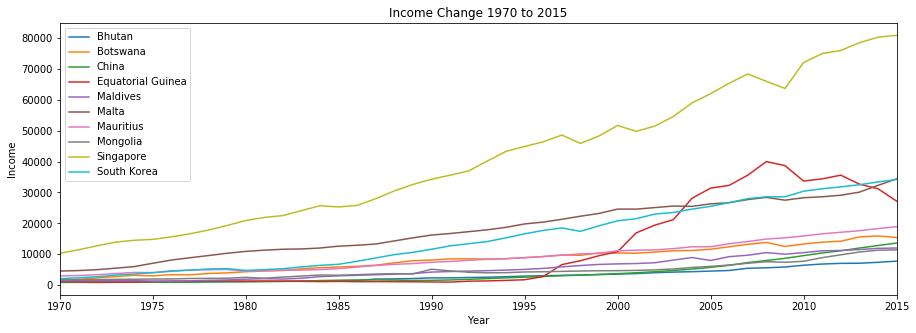

In [6]:
# Plot to see growth curves of top 5% of coutries based on their income growth for the 45 year span

# plot one line for each of the countries in the top 5 growth list
num = len(top_country_names)

for i in range(num):
    df_top_5.iloc[i,1:-1].plot(kind='line', legend=True, figsize=(15, 5));  

plt.legend(top_country_names)
plt.xlabel('Year'); plt.ylabel('Income')
plt.title('Income Change 1970 to 2015')
plt.show()

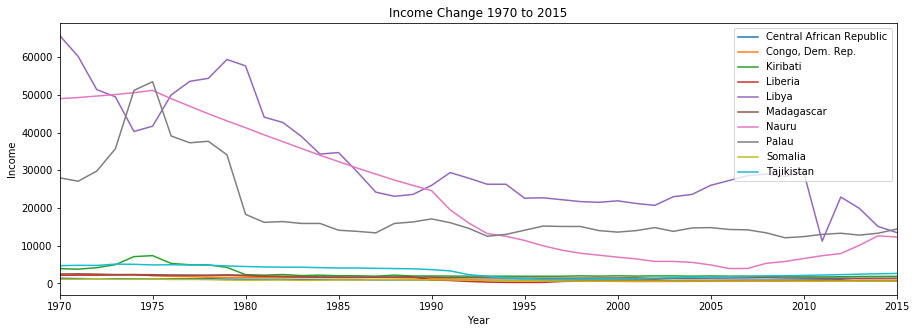

In [7]:
# Plot to see growth curves of bottpm 5% of coutries based on their income growth for the 45 year span

# plot one line for each of the countries in the bottom 5 growth list
num = len(bottom_country_names)

for i in range(num):
    df_bottom_5.iloc[i,1:-1].plot(kind='line', legend=True, figsize=(15, 5))  

plt.legend(bottom_country_names, loc='upper right')
plt.xlabel('Year'); plt.ylabel('Income')
plt.title('Income Change 1970 to 2015')
plt.show()

Based on the charts above, the curves that are the most interesting to me are those from Singapore (top 5) and Libya (bottom 5). I would like to So, the next step will be to isolate the income and other variable data for those two countries. 

In [8]:
# Reduce the Income dataframe to have only rows for the two countries I want to investigate and reset the index

df = df_income_select
df = df.loc[df['country'].isin(['Singapore', 'Libya'])]
df = df.reset_index(drop=True)

# print the result to verify it worked
print(df)

     country   1970   1971   1972   1973   1974   1975   1976   1977   1978  \
0      Libya  65800  60200  51400  49500  40300  41700  50000  53600  54400   
1  Singapore  10300  11400  12700  13900  14500  14800  15600  16600  17800   

   ...   2007   2008   2009   2010   2011   2012   2013   2014   2015  \
0  ...  28600  29000  28400  29600  11200  22900  19900  15100  13500   
1  ...  68400  66000  63700  72100  75000  76000  78500  80300  80900   

     growth  
0 -0.794833  
1  6.854369  

[2 rows x 48 columns]


In [9]:
# It worked, but I have a column that I do not need. Remove the growth column I added earlier

df = df.drop(columns=['growth'])
df_income_select = df

print(df_income_select)

     country   1970   1971   1972   1973   1974   1975   1976   1977   1978  \
0      Libya  65800  60200  51400  49500  40300  41700  50000  53600  54400   
1  Singapore  10300  11400  12700  13900  14500  14800  15600  16600  17800   

   ...   2006   2007   2008   2009   2010   2011   2012   2013   2014   2015  
0  ...  27300  28600  29000  28400  29600  11200  22900  19900  15100  13500  
1  ...  65400  68400  66000  63700  72100  75000  76000  78500  80300  80900  

[2 rows x 47 columns]


In [10]:
''' Reduce the rest of the dataframes by slicing the columns to include only the range I want 1970-2015 and only 
    the two countries. I will use the same method I used for Income, but create a function to do so all in one step. 
'''
countries = ['Singapore', 'Libya']
first_year = '1970'
last_year = '2016' # this is the end of the range plus 1 

# Create a function that will find the column index for the 1970 and 2016 columns, then remove all other year columns 
#    and select only the rows for the two countries I want to study. 
#    Also resets index so that Libya is 0 and Singapore is 1

def reduce_df(df):
    first_yr = df.columns.get_loc(first_year)
    last_yr = df.columns.get_loc(last_year)
    df = df.iloc[:, np.r_[0:1, first_yr:last_yr]]
    df = df.loc[df['country'].isin(countries)]
    df = df.reset_index(drop=True)
    return df

# Call the function for each of the independent variable dataframes and rename the new dataframe with '_select' at the end
# dataframes = [df_population, df_school, df_fertility, df_mortality, df_expectancy]

df_population_select = reduce_df(df_population)
print(df_population_select.head(2))

df_fertility_select = reduce_df(df_fertility)
print(df_fertility_select.head(2))

df_mortality_select = reduce_df(df_mortality)
print(df_mortality_select.head(2))

df_expectancy_select = reduce_df(df_expectancy)
print(df_expectancy_select.head(2))

     country     1970     1971     1972     1973     1974     1975     1976  \
0      Libya  2130000  2230000  2330000  2430000  2540000  2650000  2750000   
1  Singapore  2070000  2110000  2150000  2190000  2230000  2260000  2290000   

      1977     1978  ...     2006     2007     2008     2009     2010  \
0  2870000  2980000  ...  5880000  5970000  6050000  6120000  6170000   
1  2320000  2340000  ...  4610000  4730000  4850000  4970000  5070000   

      2011     2012     2013     2014     2015  
0  6190000  6200000  6200000  6200000  6230000  
1  5180000  5270000  5360000  5450000  5540000  

[2 rows x 47 columns]
     country  1970  1971  1972  1973  1974  1975  1976  1977  1978  ...  2006  \
0      Libya  8.13  8.15  8.14  8.10  8.05  7.97  7.87  7.74  7.58  ...  2.46   
1  Singapore  3.19  3.01  2.84  2.65  2.46  2.27  2.10  1.95  1.83  ...  1.28   

   2007  2008  2009  2010  2011  2012  2013  2014  2015  
0  2.44  2.43  2.42  2.41  2.40  2.39  2.37  2.35  2.31  
1  1.29  1.2

In [11]:
# Combine the dataframes into one to allow for visualization and more investigation


dataframes_select = (df_income_select, df_population_select, df_fertility_select, 
                     df_mortality_select, df_expectancy_select)

names = ['income', 'population', 'fertility', 'mortality', 'expectancy']

# Create a dataframe for the Libya data using the first row in each of the variable dataframes
# Create a dataframe for the Singapore data using the second row in each of the variable dataframes

df_libya = pd.DataFrame() 
df_singapore = pd.DataFrame()

for i, df in enumerate(dataframes_select):
    name = names[i]
    df_libya[name] = df.iloc[0,1:]
    df_singapore[name] = df.iloc[1,1:]

# Fix the index in each dataframe and rename the first column as 'year'
columns = ['year'] + names

df_libya = df_libya.reset_index()
df_libya.columns = columns
print(df_libya.head())

df_singapore = df_singapore.reset_index()
df_singapore.columns = columns
print(df_singapore.head())

   year income population fertility mortality expectancy
0  1970  65800    2130000      8.13       137       66.1
1  1971  60200    2230000      8.15       127       66.9
2  1972  51400    2330000      8.14       118       67.5
3  1973  49500    2430000       8.1       109       68.1
4  1974  40300    2540000      8.05       102       68.5
   year income population fertility mortality expectancy
0  1970  10300    2070000      3.19      27.4       68.7
1  1971  11400    2110000      3.01        26       68.9
2  1972  12700    2150000      2.84      24.3       69.2
3  1973  13900    2190000      2.65        22       69.5
4  1974  14500    2230000      2.46      19.6       69.9


In [12]:
# Plot all the variables to understand the trends among the Libya data

# Data for labels 
names = ['income', 'population', 'fertility', 'mortality', 'expectancy']
titles = ['Income per person gdppercapita inflation adjusted',
    'Total population',
    'Children per Woman Total Fertility',
    'Child_Mortality 0-5 Year Olds Dying Per 1000 Born',
    'Life Expectancy in Years']
years = ['1970', '1975', '1980','1985', '1990', '1995', '2000', '2005', '2010', '2015']
   

# Plot each variable across the year column for Libya
df = df_libya
x_val = df['year']


for i, name in enumerate(names):
    color = colors[i]
    y_val = df[name]
    title = titles[i]
    plt.figure(figsize=(15,4))
    plt.plot(x_val, y_val, color=color, linewidth=2, label=name)
    plt.title('Trends from 1970 to 2015 in Libya')
    plt.xticks(years)
    plt.xlabel('Year')
    plt.ylabel(title)
    plt.legend()
    plt.show()
    

NameError: name 'colors' is not defined

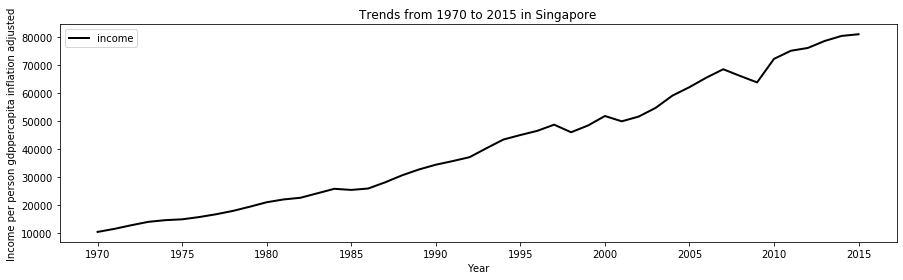

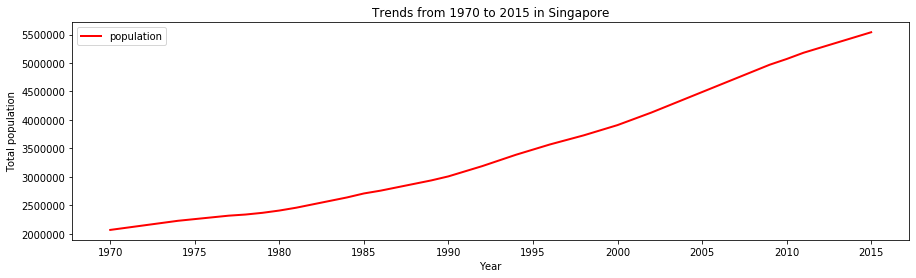

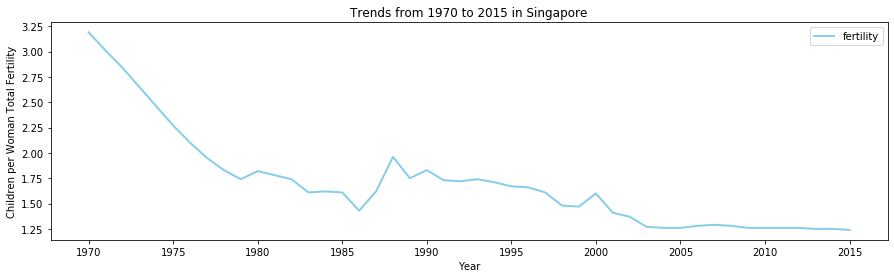

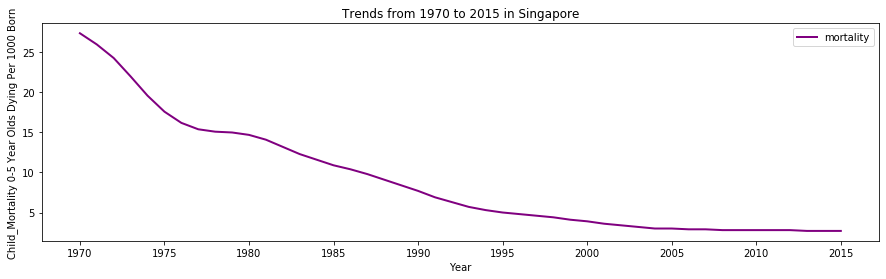

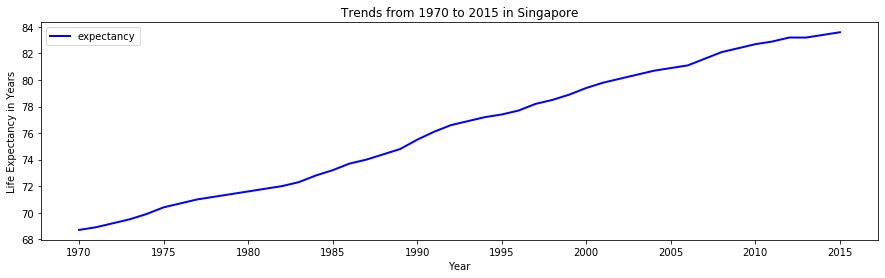

In [195]:
# Plot all the variables to understand the trendlines and possible correlations

# Plot each variable across the year column for Singapore
df= df_singapore
x_val = df['year']

for i, name in enumerate(names):
    color = colors[i]
    y_val = df[name]
    title = titles[i]
    plt.figure(figsize=(15,4))
    plt.plot(x_val, y_val, color=color, linewidth=2, label=name)
    plt.title('Trends from 1970 to 2015 in Singapore')
    plt.xticks(years)
    plt.xlabel('Year')
    plt.ylabel(title)
    plt.legend()    
    plt.show()
    

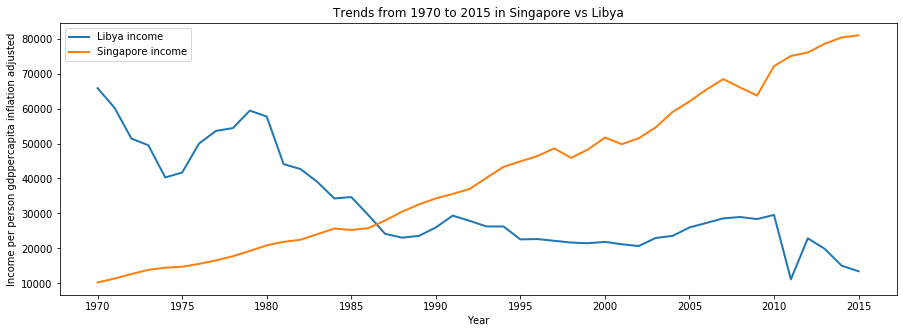

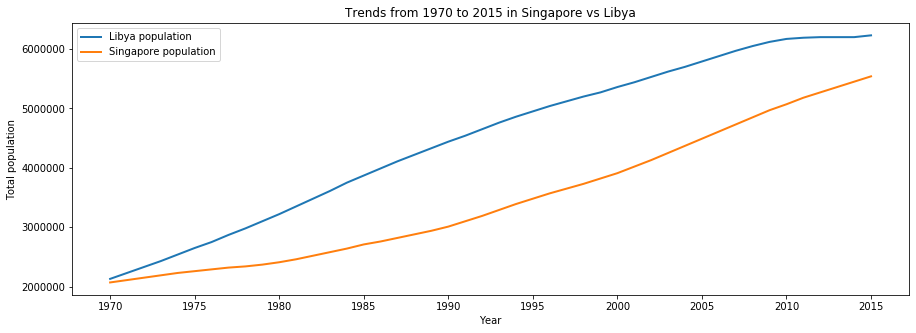

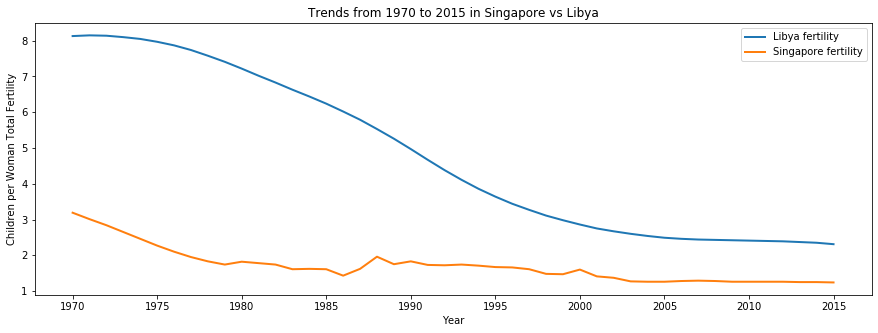

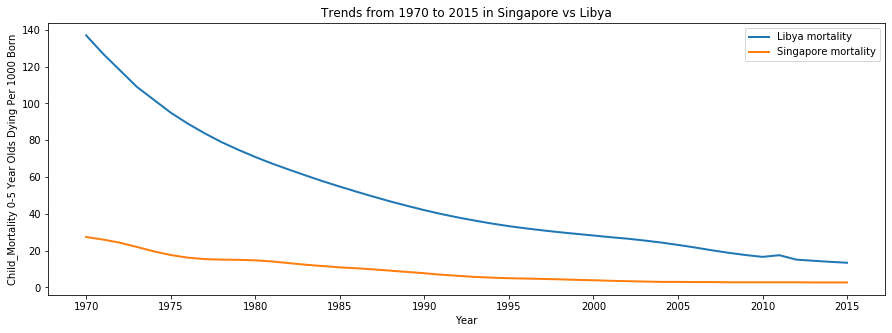

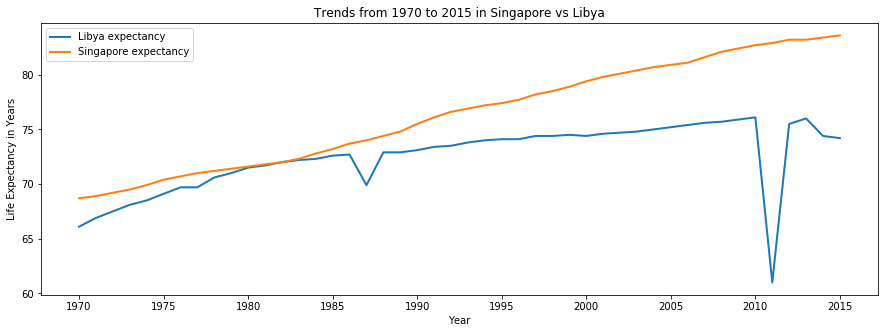

In [196]:
# Plot all the variables to understand the trendlines and possible correlations

# Plot each variable across the year column for Singapore
df0 = df_libya
df1 = df_singapore


for i, name in enumerate(names):
    color = colors[i]
    x_val = df0['year']
    y0_val = df0[name]
    y1_val = df1[name]
    title = titles[i]
    plt.figure(figsize=(15,5))
    plt.plot(x_val, y0_val, linewidth=2, label=('Libya ' + name))
    plt.plot(x_val, y1_val, linewidth=2, label=('Singapore ' + name))
    plt.xticks(years)
    plt.title('Trends from 1970 to 2015 in Singapore vs Libya')
    plt.xlabel('Year')
    plt.ylabel(title)
    plt.legend()    
    plt.show()